In [1]:
import pandas as pd
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [3]:
TrnFlsPth=gb.glob("DTrain/*/*")
TstFlsPth=gb.glob("DTest/*/*")

In [4]:
Tr_lbl=[e.strip().split('\\')[1] for e in TrnFlsPth]
Ts_lbl=[e.strip().split('\\')[1] for e in TstFlsPth]
trl=[]
a={trl.append(e) for e in Tr_lbl if(e not in trl)}
tsl=[]
a={tsl.append(e) for e in Ts_lbl if(e not in tsl)}
a=None
print(trl, '\n', tsl)

['alum', 'barley', 'coffee', 'dmk', 'fuel', 'livestock', 'palm-oil', 'retail', 'soybean', 'veg-oil'] 
 ['alum', 'barley', 'coffee', 'dmk', 'fuel', 'livestock', 'palm-oil', 'retail', 'soybean', 'veg-oil']


In [5]:
le =LabelEncoder()
Y_Tr=le.fit_transform(Tr_lbl)
Y_Ts=le.fit_transform(Ts_lbl)

In [6]:
fpt=[open(f) for f in TrnFlsPth]
Trfob=[f.read().replace("\\",'').replace('//',' ').replace('/',' ') for f in fpt]
all(f.close() for f in fpt)

False

In [7]:
fpt=[open(f) for f in TstFlsPth]
Tsfob=[f.read().replace("\\",'').replace('//',' ').replace('/',' ') for f in fpt]
all(f.close() for f in fpt)
fpt=None

In [8]:
rd={'\n':' ','<':' ','>':' ','(':' ',')':' ','[':' ',']':' ','{':' ','}':' ','?':' ',  
    ':':' ', ",":'','.':' ', '|':' ', '_':' ', '||':' '}
#\

In [9]:
Trfob=[''.join([rd.get(c,c) for c in flob]) for flob in Trfob]
Tsfob=[''.join([rd.get(c,c) for c in flob]) for flob in Tsfob]

In [10]:
Trfob=[' '.join(flob.split()) for flob in Trfob]
Tsfob=[' '.join(flob.split()) for flob in Tsfob]

In [11]:
lm=WordNetLemmatizer()
ps=PorterStemmer()
Trfob=[' '.join([lm.lemmatize(word) for word in text.split(' ')]) for text in Trfob]
Tsfob=[' '.join([lm.lemmatize(word) for word in text.split(' ')]) for text in Tsfob]
Trfob=[' '.join([ps.stem(word) for word in text.split(' ')]) for text in Trfob]
Tsfob=[' '.join([ps.stem(word) for word in text.split(' ')]) for text in Tsfob]

In [12]:
Trfob[0]

"nippon light metal continu aluminium output cut tokyo march 2 - nippon light metal Co ltd nlgt T which ha annual capac of 63000 tonn will continu primari aluminium product at a rate of 35000 tonn owe to low domest and world price and low water suppli at it hydroelectr power plant a compani offici said nippon which ha no plan to restor output to the 48000 tonn a year at which it wa work until late 1986 will becom japan' onli smelter ryoka light metal industri ltd will stop smelt in april owe to high power cost and low price and mitsui aluminium Co ltd ha said it stop smelt in februari"

In [13]:
vc=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.3, min_df=1,
                   ngram_range=(1, 1), stop_words='english')
idft=TfidfTransformer()

In [14]:
TrDvcX=vc.fit_transform(Trfob)
TrDtvcX=idft.fit_transform(TrDvcX.toarray())
###############
TsDvcX=vc.transform(Tsfob)
TsDtvcX=idft.transform(TsDvcX.toarray())

In [15]:
TrDvc=pd.DataFrame(TrDvcX.toarray(), columns=vc.get_feature_names())
TrDtvc=pd.DataFrame(TrDtvcX.toarray(), columns=vc.get_feature_names())
###############
TsDvc=pd.DataFrame(TsDvcX.toarray(), columns=vc.get_feature_names())
TsDtvc=pd.DataFrame(TsDtvcX.toarray(), columns=vc.get_feature_names())

In [16]:
print(TrDvc.shape, TrDtvc.shape, TsDvc.shape, TsDtvc.shape)

(499, 5694) (499, 5694) (185, 5694) (185, 5694)


In [17]:
lex=['0','00','000','0000']
exstp=[fv for fv in TrDtvc if(len(fv)<3)]
stpwd=ENGLISH_STOP_WORDS.union(exstp,lex)
len(stpwd)

488

In [18]:
#########

In [19]:
clfg=GaussianNB()
clfg

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
evlp=['Precision_micro','Recall_micro','Precision_macro','Recall_macro','f1_micro',
     'f1_macro','Accuracy']
confp=['max df','min df','ngram','idf','no. token']
confg=[]
prf=[]

In [21]:
clfg.fit(TrDvc, Tr_lbl)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
y_pred=clfg.predict(TsDvc)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
print(a1,'\n',a2,'\n',a3,'\n',a4)

0.572972972972973 
 0.572972972972973 
 0.6259771344180481 
 0.4926514642818991


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))
confg.append(('0.3','1',"1 - 1",'No','5694'))

0.572972972972973 
 0.5220823114702808 
 0.572972972972973


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)

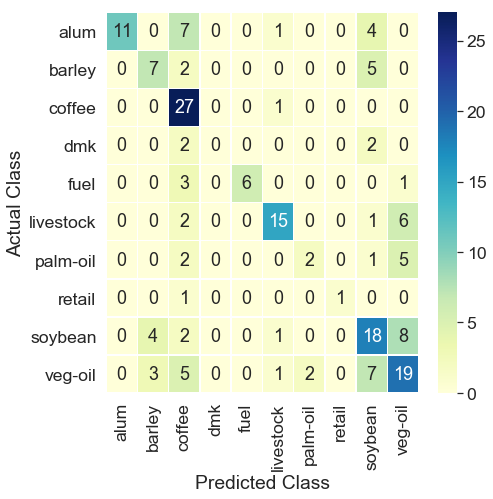

In [25]:
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
#plt.title('Confusion Matrix NBG_fig1')
plt.savefig('Fig/NBGcm1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [26]:
clfg.fit(TrDtvc, Tr_lbl) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
y_pred=clfg.predict(TsDtvc)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
print(a1,'\n',a2,'\n',a3,'\n',a4)

0.5783783783783784 
 0.5783783783783784 
 0.6277330181823121 
 0.49720569383612867


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))
confg.append(('0.3','1',"1 - 1",'Yes','5694'))

0.5783783783783784 
 0.524205303579532 
 0.5783783783783784


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)

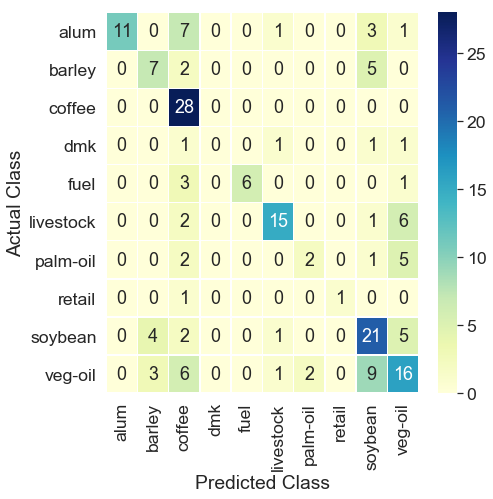

In [30]:
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, fmt="d", annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.savefig('Fig/NBGcm2.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [31]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/NBGconf1.csv')
stp

,max df,min df,ngram,idf,no. token
0,0.3,1,1 - 1,No,5694
1,0.3,1,1 - 1,Yes,5694


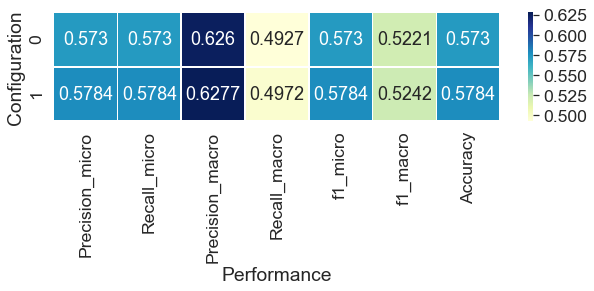

In [32]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBGprf1.csv')
plt.figure(figsize=(10,2))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBG_fig2')
plt.savefig('Fig/NBGprf1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [33]:
#ruk ruk################

In [34]:
prf=[]
clsfv=GaussianNB()
clsfv

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
pipclf = Pipeline([('vct', vc), ('clf',clsfv)])#('idf', idft),

In [36]:
mxd=[ 0.3, 0.35, 0.4]
mid=[0.005,0.01, 0.05, 0.1,1]
ngm=[(1,1),(1,2),(1,3),(2,5),(1,7),(1,9),(1,12)]
#c=[0.005,0.05,0.1,0.15,0.2,0.3,1,2,7,9]

In [37]:
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd]
       }

In [38]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [ ]:
clfrb.named_steps

In [ ]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

In [ ]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

In [ ]:
clfrb.named_steps

In [ ]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

In [ ]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

In [ ]:
clfrb.named_steps

In [ ]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

In [ ]:
#####ruk ruk############################

In [ ]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBGprf2.csv')
plt.figure(figsize=(10,3))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBG_fig2')
plt.savefig('Fig/NBGprf2.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [ ]:
#ruk ruk ################ ruk ruk##########################################

In [ ]:
prf=[]
pipclf = Pipeline([('vct', vc), ('idf', idft), ('clf',clsfv)])#

In [ ]:
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd]
       }

In [ ]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

In [ ]:
clfrb.named_steps

In [ ]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

In [ ]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

In [ ]:
clfrb.named_steps

In [ ]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

In [ ]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_macro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_
clfrb.named_steps

In [ ]:
clfrb.named_steps

In [ ]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

In [ ]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_macro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_
clfrb.named_steps

In [ ]:
clfrb.named_steps

In [ ]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

In [ ]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

In [ ]:
clfrb.named_steps

In [ ]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

In [ ]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBGprf3.csv')
plt.figure(figsize=(10,3))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBG_fig2')
plt.savefig('Fig/NBGprf3.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [ ]:
###############################################

In [ ]:
evlp=['Precision_micro','Recall_micro','Precision_macro','Recall_macro','f1_micro',
     'f1_macro','Accuracy']
confp=['max df','min df','ngram','idf','no. token','alpha']
confg=[]
prf=[]

In [ ]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.4, min_df=0.01,
                   ngram_range=(1, 2), stop_words=stpwd)
idft1=TfidfTransformer()

In [ ]:
TrDX=vc1.fit_transform(Trfob)
TrDtX=idft1.fit_transform(TrDX.toarray())
###############
TsDX=vc1.transform(Tsfob)
TsDtX=idft1.transform(TsDX.toarray())

In [ ]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc1.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc1.get_feature_names())
###############
TsD=pd.DataFrame(TsDX.toarray(), columns=vc1.get_feature_names())
TsDt=pd.DataFrame(TsDtX.toarray(), columns=vc1.get_feature_names())

In [ ]:
print(TrD.shape, TrDt.shape, TsD.shape, TsDt.shape)

In [ ]:
clfg=GaussianNB()

In [ ]:
clfg.fit(TrD, Tr_lbl)

In [ ]:
y_pred=clfg.predict(TsD)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

In [ ]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.4','0.01',"1 - 2",'No','2734'))

In [ ]:
clfg.fit(TrDt, Tr_lbl)

In [ ]:
y_pred=clfg.predict(TsDt)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

In [ ]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.4','0.01',"1 - 2",'Yes','2734'))

In [ ]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
#plt.title('Confusion Matrix NBG_fig1')
plt.savefig('Fig/NBGcm3.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [ ]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/NBGconf2.csv')
stp

In [ ]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBGprf4.csv')
plt.figure(figsize=(10,2))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBG_fig2')
plt.savefig('Fig/NBGprf4.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [ ]:
#ruk#################ruk

In [ ]:
cvp=['1','2','3','4','5','6','7','8','9','10','Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clfg, TsD, Ts_lbl, cv=10, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/10)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('10')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clfg, TsD, Ts_lbl, cv=10, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/10)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('10')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/NBGcvpf110.csv')
rsl
#print(len(sr1),len(sr2))

In [ ]:
cvp=['1','2','3','4','5','6','7','8','9','10','Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clfg, TrDt, Tr_lbl, cv=10, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/10)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('10')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clfg, TrDt, Tr_lbl, cv=10, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/10)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('10')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/NBGcvpf110t.csv')
rsl
#print(len(sr1),len(sr2))

In [ ]:
cvp=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
    'Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clfg, TrDt, Tr_lbl, cv=20, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/20)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('20')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clfg, TrDt, Tr_lbl, cv=20, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/20)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('20')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/NBGcvpf120.csv')
rsl
#print(len(sr1),len(sr2))